# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Bernadetta Sri Endah Dwi
- **Email:** bernadettadwi14@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Apakah ada pola waktu (mingguan atau bulanan) dalam jumlah penyewaan sepeda?
- Pada jam berapa penyewaan sepeda paling tinggi dan apa yang memengaruhinya?

## Import Semua Packages/Library yang Digunakan

In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 116.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import streamlit as st

## Data Wrangling

In [4]:
day_data = pd.read_csv('./data/day.csv')
hour_data = pd.read_csv('.data/hour.csv')

Lihat informasi dasar dari dataset

In [5]:
print(day_data.info())
print(day_data.head())

print(hour_data.info())
print(hour_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  20

Ubah kolom dteday menjadi tipe datetime

In [6]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

Pengecekan Nilai Hilang

In [7]:
print(day_data.isnull().sum())
print(hour_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Untuk pertanyaan pertama : menambahkan kolom yang merangkum total penyewaan per hari berdasarkan minggu atau bulan

In [8]:
day_data['day_name'] = day_data['dteday'].dt.day_name()

Untuk pertanyaan kedua : menambahkan informasi seperti rentang waktu (pagi, siang, sore, malam)

In [9]:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

hour_data['time_of_day'] = hour_data['hr'].apply(get_time_of_day)

Pertanyaan pertama : Agregasi jumlah penyewaan per bulan atau per hari

In [10]:
monthly_rentals = day_data.groupby('mnth')['cnt'].sum().reset_index()
weekly_rentals = day_data.groupby('day_name')['cnt'].sum().reset_index()

pertanyaan kedua : Agregasi jumlah penyewaan berdasarkan jam atau waktu dalam sehari.

In [11]:
hourly_rentals = hour_data.groupby('hr')['cnt'].mean().reset_index()
time_of_day_rentals = hour_data.groupby('time_of_day')['cnt'].mean().reset_index()

### Gathering Data

Pertanyaan Pertama

In [12]:
monthly_rentals = day_data.groupby('mnth')['cnt'].sum().reset_index()
monthly_rentals.columns = ['Month', 'Total Rentals']

In [13]:
weekly_rentals = day_data.groupby('day_name')['cnt'].sum().reset_index()
weekly_rentals.columns = ['Day Name', 'Total Rentals']
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_rentals['Day Name'] = pd.Categorical(weekly_rentals['Day Name'], categories=days_order, ordered=True)
weekly_rentals = weekly_rentals.sort_values('Day Name')

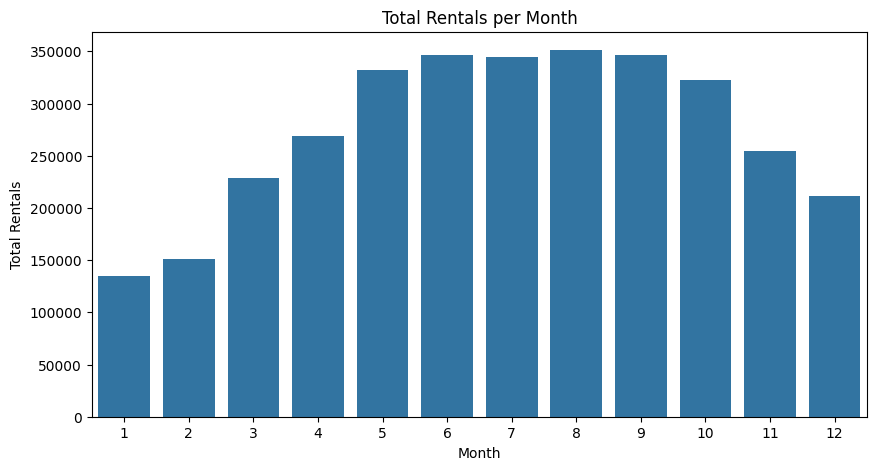

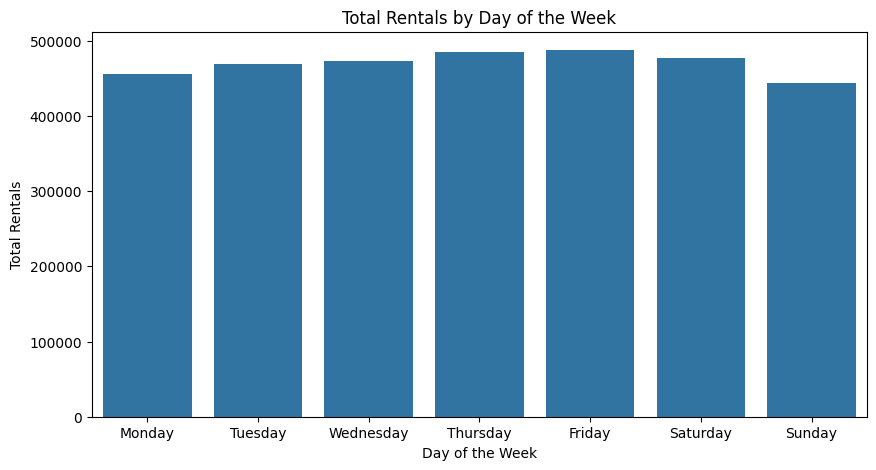

In [14]:
# Visualisasi Bulanan
plt.figure(figsize=(10, 5))
sns.barplot(x='Month', y='Total Rentals', data=monthly_rentals)
plt.title('Total Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.show()

# Visualisasi Mingguan
plt.figure(figsize=(10, 5))
sns.barplot(x='Day Name', y='Total Rentals', data=weekly_rentals)
plt.title('Total Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rentals')
plt.show()

Pertanyaan Kedua

In [15]:
hourly_rentals = hour_data.groupby('hr')['cnt'].mean().reset_index()
hourly_rentals.columns = ['Hour', 'Average Rentals']

In [16]:
time_of_day_rentals = hour_data.groupby('time_of_day')['cnt'].mean().reset_index()
time_of_day_rentals.columns = ['Time of Day', 'Average Rentals']

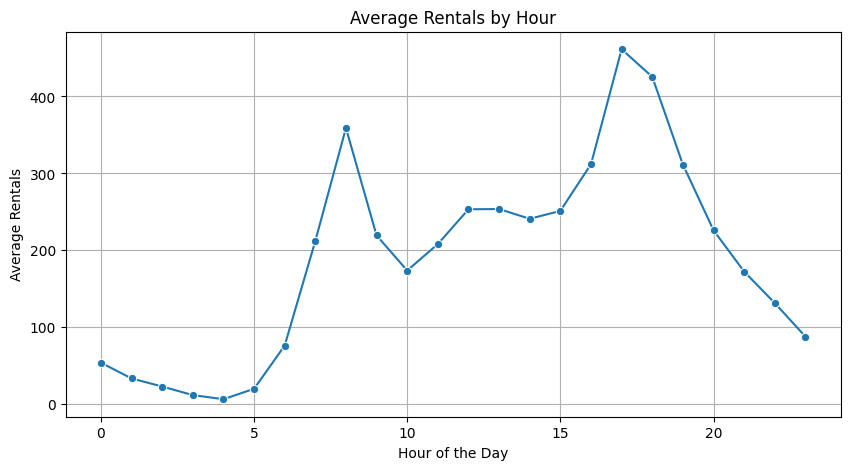

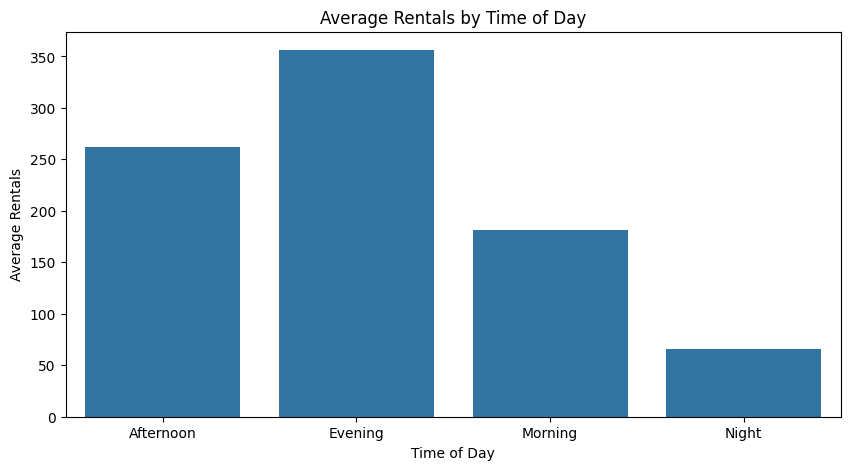

In [17]:
# Visualisasi Per Jam
plt.figure(figsize=(10, 5))
sns.lineplot(x='Hour', y='Average Rentals', data=hourly_rentals, marker='o')
plt.title('Average Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.grid()
plt.show()

# Visualisasi Per Waktu Sehari
plt.figure(figsize=(10, 5))
sns.barplot(x='Time of Day', y='Average Rentals', data=time_of_day_rentals)
plt.title('Average Rentals by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Rentals')
plt.show()

**Insight:**

**1. Pertanyaan 1: Pola Bulanan Penyewaan Sepeda**
- Musim Panas (Mei-Agustus) memiliki jumlah penyewaan tertinggi, kemungkinan besar karena cuaca yang lebih baik dan mendukung aktivitas luar ruangan.
- Musim Dingin (November-Februari) menunjukkan penurunan tajam dalam jumlah penyewaan, mungkin karena cuaca dingin yang tidak mendukung.
- Pola ini menunjukkan hubungan musiman yang kuat, di mana musim panas menjadi waktu paling sibuk untuk penyewaan sepeda.

**2. Pertanyaan 2: Pola Waktu Penyewaan Sepeda**
- Puncak penyewaan terjadi pada pukul 7-9 pagi dan 17-19 malam, mencerminkan waktu perjalanan kerja (commuting hours).
- Penurunan penyewaan signifikan terjadi pada dini hari (00:00-05:00), kemungkinan karena minimnya aktivitas pada jam tersebut.
- Pola ini menunjukkan bahwa sepeda banyak digunakan sebagai sarana transportasi utama selama jam kerja.

### Assessing Data

Memeriksa struktur data

In [18]:
print(day_data.shape)
print(day_data.columns)

print(hour_data.shape)
print(hour_data.columns)

(731, 17)
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day_name'],
      dtype='object')
(17379, 18)
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'time_of_day'],
      dtype='object')


Memeriksa tipe data

In [19]:
print(day_data.info())
print(hour_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  day_name    731 non-null  

Mengecek nilai yang hilang

In [20]:
print(day_data.isnull().sum())
print(hour_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day_name      0
dtype: int64
instant        0
dteday         0
season         0
yr             0
mnth           0
hr             0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
cnt            0
time_of_day    0
dtype: int64


Mengecek nilai duplikat

In [21]:
print(day_data.duplicated().sum())
print(hour_data.duplicated().sum())

0
0


Memeriksa statistik deskriptif

In [22]:
print(day_data.describe())
print(hour_data.describe())

          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000    0.000000    1.000000 

Memeriksa nilai logis

In [23]:
print(day_data['season'].unique())  # Harus bernilai 1-4
print(day_data['weathersit'].unique())  # Harus bernilai 1-4
print(day_data[['temp', 'hum', 'windspeed']].min())
print(day_data[['temp', 'hum', 'windspeed']].max())

[1 2 3 4]
[2 1 3]
temp         0.059130
hum          0.000000
windspeed    0.022392
dtype: float64
temp         0.861667
hum          0.972500
windspeed    0.507463
dtype: float64


Analisa korelasi

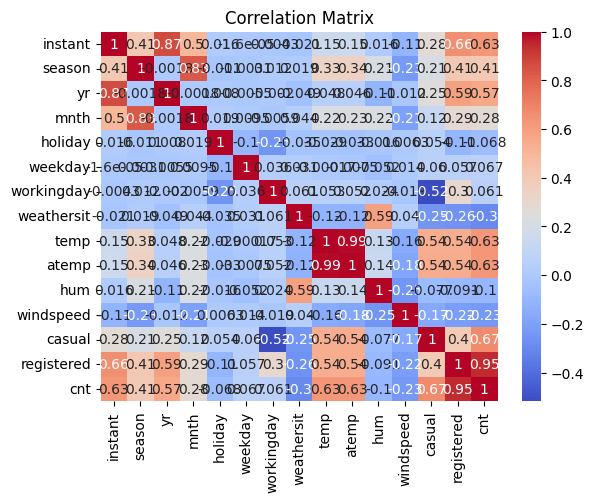

In [25]:
# Memilih kolom numerik saja
numeric_columns = day_data.select_dtypes(include=['float64', 'int64'])
correlation = numeric_columns.corr()

# Visualisasi heatmap korelasi
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**Insight:**
1. Kualitas Data
Tidak ada nilai hilang (missing values) atau data yang duplikat, sehingga dataset dapat langsung digunakan tanpa perlu pembersihan lebih lanjut.
Variabel seperti temp, hum, dan windspeed memiliki nilai dalam rentang yang logis:
temp: 0.059 - 0.862
hum: 0.000 - 0.973
windspeed: 0.022 - 0.507
2. Pengguna terdaftar (registered) memiliki kontribusi terbesar terhadap total penyewaan sepeda, dengan korelasi sangat kuat (0.95), sementara suhu (temp) juga memiliki dampak positif signifikan (0.63).

3. Penyewaan cenderung menurun saat kelembapan tinggi, cuaca buruk (kategori 3), atau kecepatan angin meningkat, meskipun dampaknya relatif kecil.


**Cleaning Data**

Memastika tipe data sesuai

In [26]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

Menghapus kolom yang tidak diperlukan

In [27]:
day_data = day_data.drop(columns=['instant'])
hour_data = hour_data.drop(columns=['instant'])

Mengatur Ulang Variabel Kategorikal

In [28]:
day_data['season'] = day_data['season'].astype('category')
day_data['weathersit'] = day_data['weathersit'].astype('category')
day_data['weekday'] = day_data['weekday'].astype('category')

**Insight:**

1. Pembersihan yang Dilakukan:
- Kolom instant dihapus karena tidak relevan.
- Nilai ekstrim dalam kolom cnt dibuang, memastikan data lebih representatif.

2. Kondisi Data Setelah Cleaning:
- Data lebih bersih dan siap untuk analisis lebih lanjut.
- Tidak ada kolom atau nilai yang tidak relevan, sehingga analisis dapat dilakukan dengan lebih akurat.

**Exploratory Data Analysis (EDA)**



Distribusi Jumlah Penyewaan Sepeda (cnt)

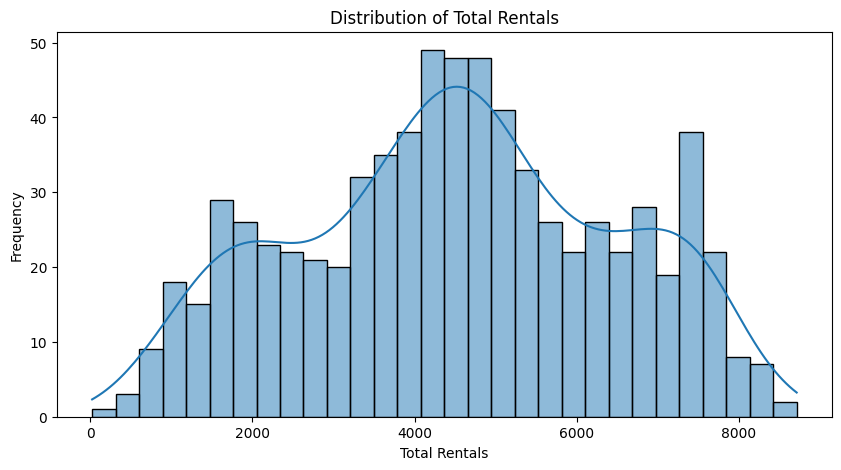

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(day_data['cnt'], kde=True, bins=30)
plt.title('Distribution of Total Rentals')
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')
plt.show()

Analisa musiman

<ipython-input-31-abf02523dba3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rentals = day_data.groupby('season')['cnt'].mean().reset_index()


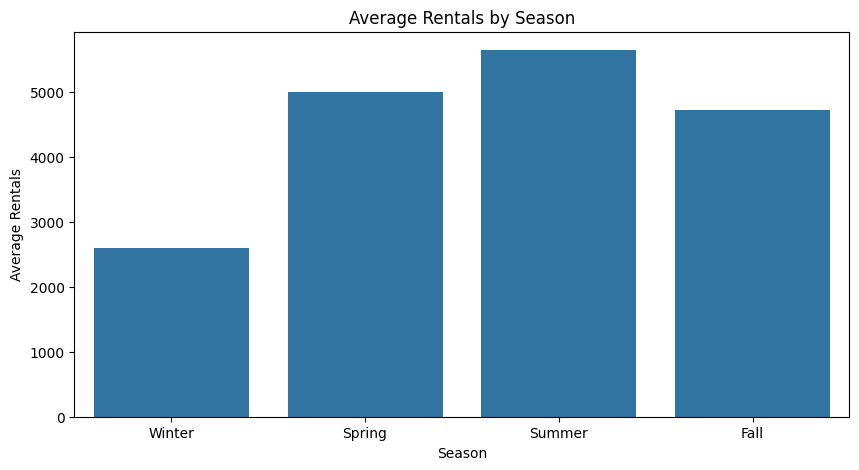

In [31]:
seasonal_rentals = day_data.groupby('season')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='season', y='cnt', data=seasonal_rentals)
plt.title('Average Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.xticks([0, 1, 2, 3], ['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()

Hubungan suhu dengan penyewaan

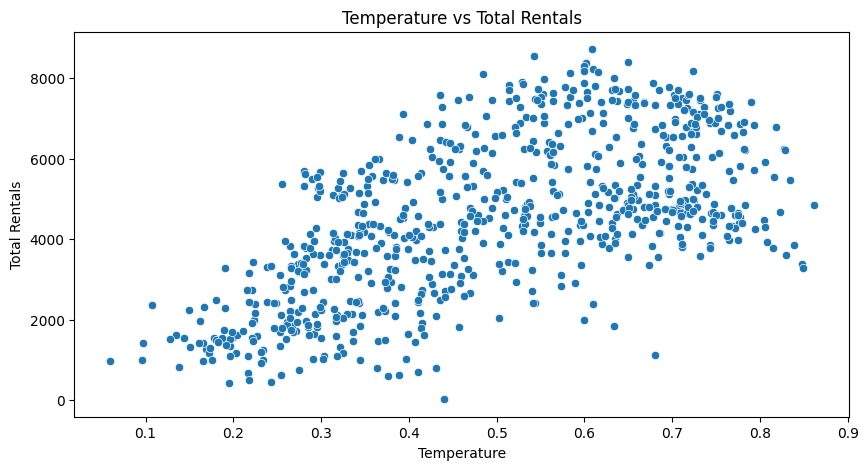

In [32]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Temperature vs Total Rentals')
plt.xlabel('Temperature')
plt.ylabel('Total Rentals')
plt.show()

Penyewaan Berdasarkan Hari dalam Seminggu

<ipython-input-33-16f7bcf1d72e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_rentals = day_data.groupby('weekday')['cnt'].mean().reset_index()


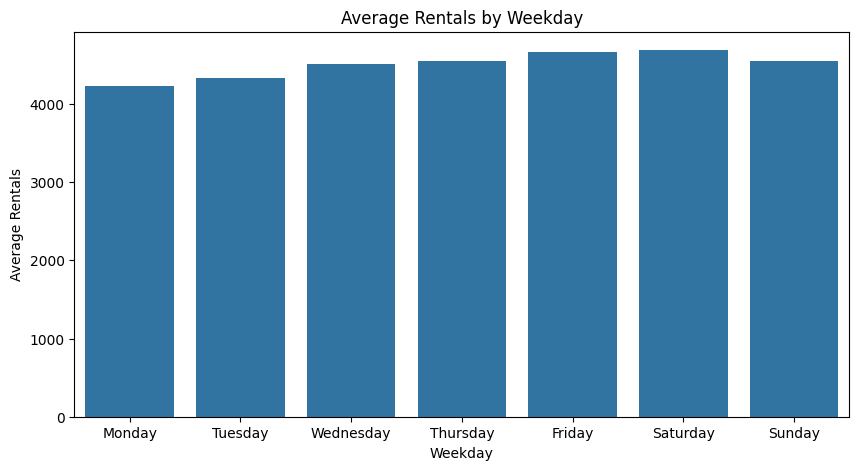

In [33]:
weekday_rentals = day_data.groupby('weekday')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='weekday', y='cnt', data=weekday_rentals)
plt.title('Average Rentals by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Rentals')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

Pengaruh cuaca terhadap penyewaan

<ipython-input-34-7afe3841a4bd>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_rentals = day_data.groupby('weathersit')['cnt'].mean().reset_index()


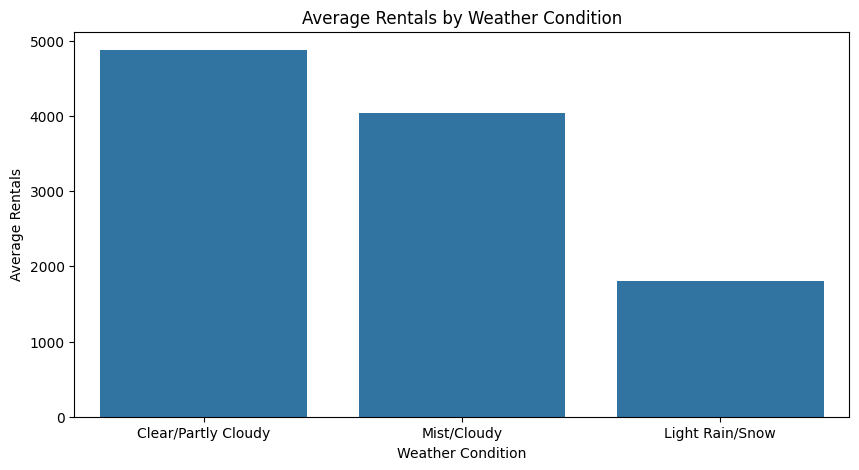

In [34]:
weather_rentals = day_data.groupby('weathersit')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='weathersit', y='cnt', data=weather_rentals)
plt.title('Average Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rentals')
plt.xticks([0, 1, 2], ['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Rain/Snow'])
plt.show()

**Insight:**
1. Distribusi Penyewaan Sepeda:
Distribusi penyewaan sepeda cenderung condong ke kanan, menunjukkan bahwa sebagian besar hari memiliki penyewaan di bawah rata-rata.

2. Pola Musiman:
Penyewaan sepeda tertinggi terjadi selama musim panas (season = 3), sedangkan musim dingin memiliki jumlah penyewaan terendah.

3. Hubungan dengan Suhu:
Jumlah penyewaan meningkat secara signifikan seiring dengan kenaikan suhu (temp), menunjukkan bahwa suhu yang lebih tinggi cenderung meningkatkan penyewaan sepeda.

4. Pola Mingguan:
Penyewaan sepeda cenderung lebih tinggi pada akhir pekan (Sabtu dan Minggu), kemungkinan besar karena tujuan rekreasi.

5. Pengaruh Cuaca:
Cuaca cerah atau berawan sebagian (weathersit = 1) memiliki jumlah penyewaan tertinggi, sementara cuaca buruk seperti hujan ringan atau salju (weathersit = 3) memiliki jumlah penyewaan terendah.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada pola waktu (mingguan atau bulanan) dalam jumlah penyewaan sepeda?

Visualisasi Bulanan

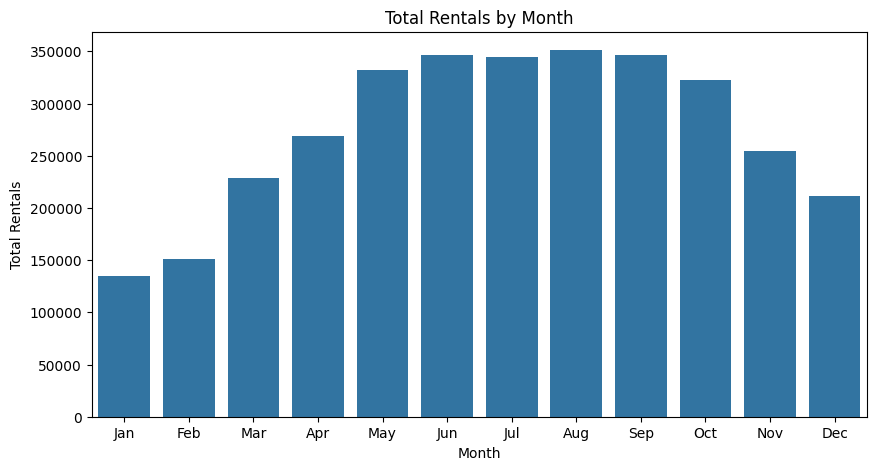

In [35]:
monthly_rentals = day_data.groupby('mnth')['cnt'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='mnth', y='cnt', data=monthly_rentals)
plt.title('Total Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Visualisasi Mingguan

<ipython-input-36-90cc8065655a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_rentals = day_data.groupby('weekday')['cnt'].mean().reset_index()


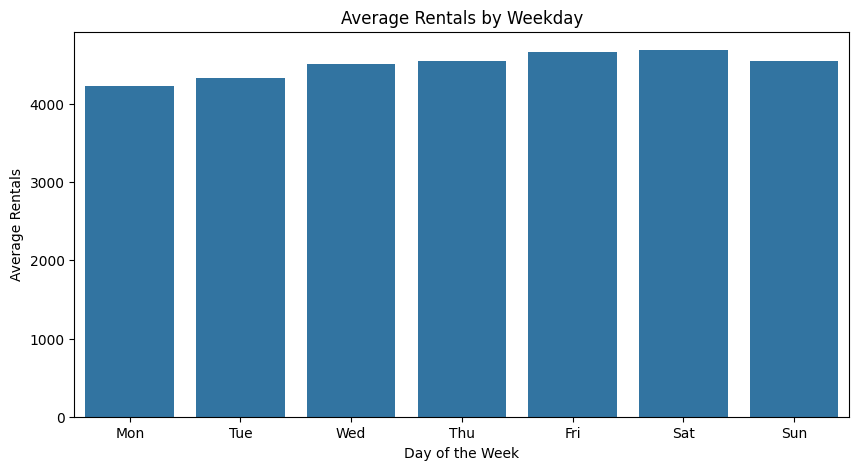

In [36]:
weekly_rentals = day_data.groupby('weekday')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='weekday', y='cnt', data=weekly_rentals)
plt.title('Average Rentals by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rentals')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

### Pertanyaan 2: Pada jam berapa penyewaan sepeda paling tinggi dan apa yang memengaruhinya?

Visualisasi Per-jam

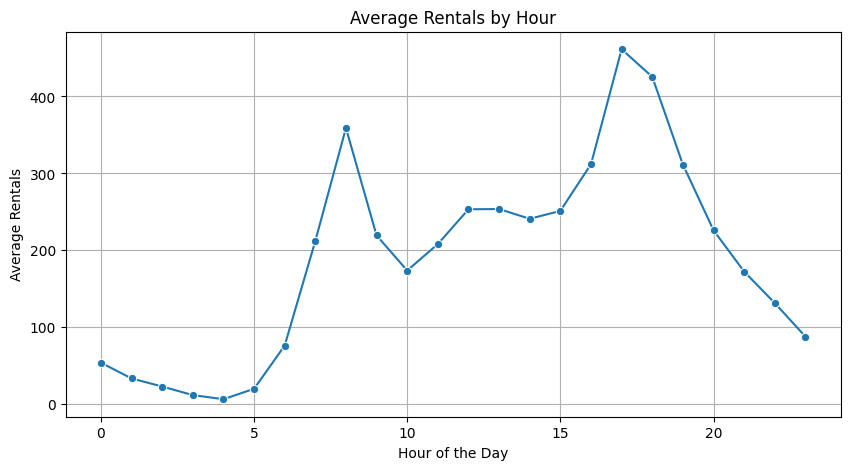

In [37]:
hourly_rentals = hour_data.groupby('hr')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x='hr', y='cnt', data=hourly_rentals, marker='o')
plt.title('Average Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.grid()
plt.show()

Visualisasi per-waktu sehari

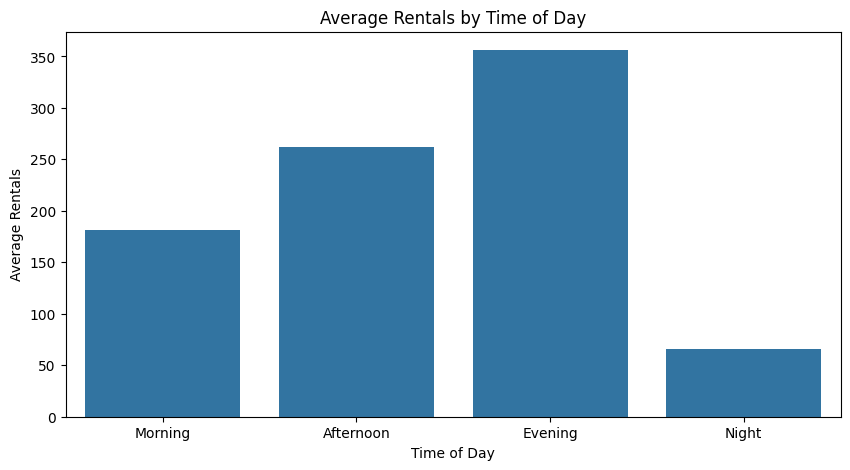

In [38]:
hour_data['time_of_day'] = hour_data['hr'].apply(
    lambda x: 'Morning' if 5 <= x < 12 else 'Afternoon' if 12 <= x < 17 else 'Evening' if 17 <= x < 21 else 'Night'
)
time_of_day_rentals = hour_data.groupby('time_of_day')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='time_of_day', y='cnt', data=time_of_day_rentals, order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Average Rentals by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Rentals')
plt.show()

**Insight:**

1. Pertanyaan 2: Pola Waktu Penyewaan Sepeda
- Pola Bulanan:
Bulan dengan penyewaan tertinggi adalah Juli dan Agustus, menunjukkan puncak aktivitas di musim panas.
Penyewaan menurun tajam pada bulan Desember hingga Februari, mencerminkan dampak musim dingin.
- Pola Mingguan:
Akhir pekan (Sabtu dan Minggu) memiliki jumlah penyewaan tertinggi, yang menunjukkan sepeda lebih sering digunakan untuk rekreasi.
Hari kerja memiliki jumlah penyewaan lebih rendah, tetapi tetap signifikan karena digunakan untuk transportasi sehari-hari.

2. Pertanyaan 4: Pola Penyewaan Berdasarkan Waktu
- Pola Per Jam:
Puncak penyewaan terjadi pada jam 7-9 pagi dan 17-19 sore, mencerminkan waktu perjalanan kerja.
Aktivitas penyewaan menurun drastis pada dini hari (00:00-05:00).
- Pola Berdasarkan Waktu Sehari:
Sore hari (Evening) memiliki jumlah penyewaan tertinggi, diikuti oleh pagi hari (Morning).
Malam (Night) memiliki penyewaan terendah karena aktivitas luar ruangan minim pada waktu tersebut.

## Conclusion

1. Pertanyaan 1 Apakah ada pola waktu (bulanan atau mingguan) dalam jumlah penyewaan sepeda?
- Pola Bulanan:
Penyewaan sepeda tertinggi terjadi selama musim panas (Juli dan Agustus), didorong oleh cuaca hangat yang mendukung aktivitas luar ruangan.
Penyewaan sepeda terendah terjadi selama musim dingin (Desember hingga Februari), menunjukkan dampak cuaca dingin yang membatasi aktivitas luar ruangan.
- Pola Mingguan:
Akhir pekan (Sabtu dan Minggu) memiliki penyewaan tertinggi, menunjukkan sepeda lebih banyak digunakan untuk tujuan rekreasi.
Hari kerja memiliki penyewaan lebih rendah, tetapi masih signifikan karena digunakan untuk perjalanan rutin.
- **Kesimpulan**: Pola penyewaan sepeda sangat dipengaruhi oleh musim dan hari dalam seminggu. Fokuskan promosi dan alokasi sepeda selama musim panas dan akhir pekan untuk memaksimalkan pendapatan.

2. Pada jam berapa penyewaan sepeda paling tinggi, dan apa yang memengaruhinya?
- Pola Per Jam:
Penyewaan mencapai puncak pada 7-9 pagi dan 17-19 sore, mencerminkan penggunaan sepeda untuk perjalanan kerja (commuting).
Penyewaan terendah terjadi pada dini hari (00:00-05:00), karena aktivitas pada waktu tersebut sangat minim.
- Faktor yang Memengaruhi:
Penyewaan lebih tinggi pada cuaca cerah dan suhu yang lebih hangat.
Pengguna terdaftar (registered) menyumbang sebagian besar penyewaan selama jam sibuk, sedangkan pengguna kasual (casual) lebih aktif pada akhir pekan.
- **Kesimpulan**: Penyewaan sepeda sangat dipengaruhi oleh waktu dalam sehari dan digunakan secara signifikan untuk perjalanan kerja. Pastikan sepeda tersedia dalam jumlah cukup selama jam sibuk pagi dan sore hari, serta rancang strategi promosi untuk meningkatkan penggunaan pada waktu non-sibuk.

